In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

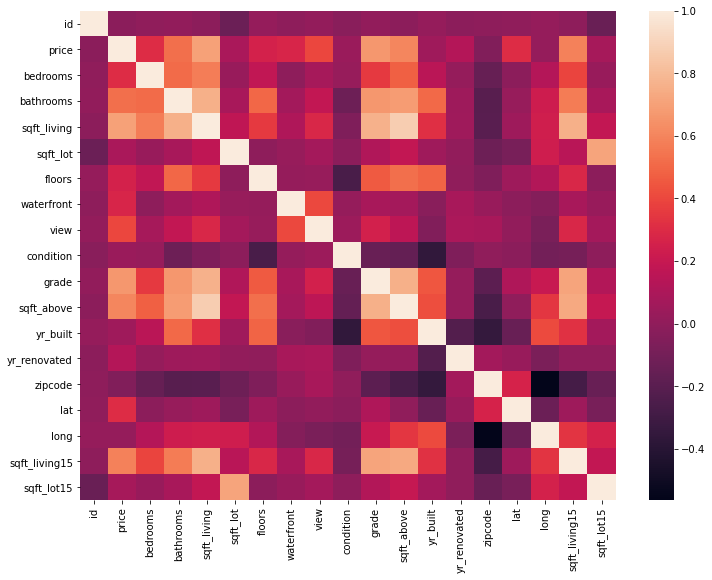

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
df.drop(columns=["sqft_above"], inplace= True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [15]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_basement  15762 non-null  object 
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 18  sqft_l

In [18]:
df.reset_index(inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          15762 non-null  int64  
 1   id             15762 non-null  int64  
 2   date           15762 non-null  object 
 3   price          15762 non-null  float64
 4   bedrooms       15762 non-null  int64  
 5   bathrooms      15762 non-null  float64
 6   sqft_living    15762 non-null  int64  
 7   sqft_lot       15762 non-null  int64  
 8   floors         15762 non-null  float64
 9   waterfront     15762 non-null  float64
 10  view           15762 non-null  float64
 11  condition      15762 non-null  int64  
 12  grade          15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

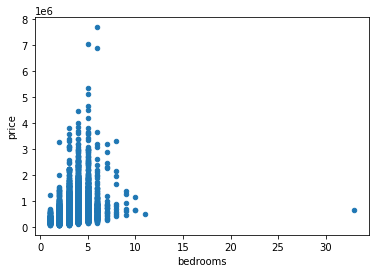

In [20]:
df.plot.scatter(x = "bedrooms", y = "price")

In [28]:
df.sqft_basement.value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
417.0        1
1930.0       1
784.0        1
283.0        1
1245.0       1
Name: sqft_basement, Length: 283, dtype: int64

<AxesSubplot:>

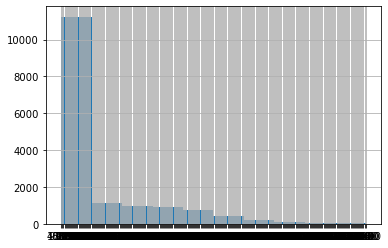

In [24]:
df.sqft_basement.hist()

# Feature engineering

In [29]:
df['date_dateformat'] = pd.to_datetime(df['date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            15762 non-null  int64         
 1   id               15762 non-null  int64         
 2   date             15762 non-null  object        
 3   price            15762 non-null  float64       
 4   bedrooms         15762 non-null  int64         
 5   bathrooms        15762 non-null  float64       
 6   sqft_living      15762 non-null  int64         
 7   sqft_lot         15762 non-null  int64         
 8   floors           15762 non-null  float64       
 9   waterfront       15762 non-null  float64       
 10  view             15762 non-null  float64       
 11  condition        15762 non-null  int64         
 12  grade            15762 non-null  int64         
 13  sqft_basement    15762 non-null  object        
 14  yr_built         15762 non-null  int64

In [32]:
df['month'] = df.date_dateformat.dt.month

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            15762 non-null  int64         
 1   id               15762 non-null  int64         
 2   date             15762 non-null  object        
 3   price            15762 non-null  float64       
 4   bedrooms         15762 non-null  int64         
 5   bathrooms        15762 non-null  float64       
 6   sqft_living      15762 non-null  int64         
 7   sqft_lot         15762 non-null  int64         
 8   floors           15762 non-null  float64       
 9   waterfront       15762 non-null  float64       
 10  view             15762 non-null  float64       
 11  condition        15762 non-null  int64         
 12  grade            15762 non-null  int64         
 13  sqft_basement    15762 non-null  object        
 14  yr_built         15762 non-null  int64

In [34]:
df.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_dateformat,month
0,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09,12
1,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09,12
2,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18,2
3,5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014-05-12,5
4,6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2014-06-27,6


In [38]:
df.groupby(by = df.month).mean()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
month,,,,,,,,,,,,,,,,,,,
1,10791.393981,4.616179e+09,530263.239398,3.411765,2.148769,2106.811218,17929.020520,1.489056,0.008208,0.217510,3.370725,7.648427,1972.009576,73.781122,98076.484268,47.552157,-122.211406,1981.062927,13144.285910
2,10562.006764,4.613242e+09,506751.232244,3.350620,2.034386,2001.934611,13486.126268,1.443630,0.005637,0.251409,3.413754,7.545660,1970.254791,56.196167,98077.740699,47.545725,-122.219930,1934.414882,11058.401353
3,10920.462166,4.666778e+09,549563.877596,3.396142,2.076039,2031.893175,16147.027448,1.470697,0.005935,0.230712,3.361276,7.617211,1970.836795,85.843472,98076.872404,47.552390,-122.213640,1965.747774,13277.220326
4,10695.833946,4.697492e+09,564719.093137,3.384191,2.133885,2076.750613,14449.430760,1.505821,0.007966,0.231005,3.359681,7.674020,1972.416667,63.555760,98079.017157,47.562695,-122.212496,1996.256127,12880.399510
5,10624.035354,4.657998e+09,545977.942200,3.354097,2.109848,2078.739057,16286.796857,1.483165,0.004489,0.230640,3.420875,7.667789,1970.211560,103.160494,98078.826599,47.562516,-122.215088,1981.072391,13488.669473
6,10552.357325,4.594381e+09,557425.136943,3.437580,2.164650,2139.772611,15219.347771,1.514650,0.009554,0.228662,3.469427,7.724841,1970.794904,72.361783,98078.617197,47.564551,-122.213238,2035.994268,13388.848408
7,10893.459988,4.543379e+09,539947.788027,3.379352,2.140348,2116.738546,14646.560782,1.512828,0.007330,0.216860,3.447159,7.707392,1971.753818,89.118509,98074.000611,47.556282,-122.203032,2030.573610,13299.398290
8,11126.661517,4.603071e+09,538253.176966,3.372893,2.143083,2101.985253,14272.971910,1.512289,0.005618,0.227528,3.425562,7.710674,1972.950140,84.096910,98076.836376,47.562934,-122.209002,2007.752809,12613.021770
9,10429.305491,4.426375e+09,533644.408353,3.352668,2.129737,2077.260634,14570.285383,1.488786,0.006187,0.247486,3.416860,7.648879,1970.230472,95.784996,98077.845321,47.563598,-122.214916,1987.939675,11388.989946


In [39]:
df.bedrooms.unique()

array([ 3,  4,  2,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [40]:
df.bedrooms.value_counts(normalize= True)

3     0.451719
4     0.322231
2     0.127078
5     0.075054
6     0.012181
1     0.008946
7     0.001459
8     0.000634
9     0.000381
10    0.000190
11    0.000063
33    0.000063
Name: bedrooms, dtype: float64

In [41]:
## pandas cut function for easy binning